<a href="https://colab.research.google.com/github/SuhasTantri/Netflix-movies-and-tv-shows-clustering/blob/main/Raghavendra_and_Suhas_Team_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [5]:
# Importing necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [6]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Reading the dataset
df=pd.read_csv('/content/drive/MyDrive/Netflix Clustering Capstone Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')
# A brief look at the dataset
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
# Looking at the information about the variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# Splitting listed in column with delimitor as , 
ll=list(df.listed_in)
list_of_listed_in=[]
for i in range(0,7787):
  list_of_listed_in.append(ll[i].split(','))


In [10]:
# Removing the ensted list to process the data
output=[]
def reemovNestings(l):
   
    for i in l:
        if type(i) == list:
            reemovNestings(i)
        else:
            output.append(i)
reemovNestings(list_of_listed_in)


In [11]:
# Removing the whitespace frpm the list
o=[]
for z in output:
  o.append(z.strip())

In [12]:
# Getting the word count of listed in
listed_in_count = {}

for i in o:
  if i in listed_in_count.keys():
    listed_in_count[i] += 1
  else:
    listed_in_count[i] = 1

In [13]:
listed_in_count

{'Action & Adventure': 721,
 'Anime Features': 57,
 'Anime Series': 148,
 'British TV Shows': 232,
 'Children & Family Movies': 532,
 'Classic & Cult TV': 27,
 'Classic Movies': 103,
 'Comedies': 1471,
 'Crime TV Shows': 427,
 'Cult Movies': 59,
 'Documentaries': 786,
 'Docuseries': 353,
 'Dramas': 2106,
 'Faith & Spirituality': 57,
 'Horror Movies': 312,
 'Independent Movies': 673,
 'International Movies': 2437,
 'International TV Shows': 1199,
 "Kids' TV": 414,
 'Korean TV Shows': 150,
 'LGBTQ Movies': 90,
 'Movies': 56,
 'Music & Musicals': 321,
 'Reality TV': 222,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Sci-Fi & Fantasy': 218,
 'Science & Nature TV': 85,
 'Spanish-Language TV Shows': 147,
 'Sports Movies': 196,
 'Stand-Up Comedy': 329,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Action & Adventure': 150,
 'TV Comedies': 525,
 'TV Dramas': 704,
 'TV Horror': 69,
 'TV Mysteries': 90,
 'TV Sci-Fi & Fantasy': 76,
 'TV Shows': 12,
 'TV Thrillers': 50,
 'Teen TV Shows': 60,
 

In [14]:
# Making word count dictionary as dataframe to visualise
listed_in_df=pd.DataFrame(listed_in_count.items(), columns=['Categories', 'Count'])
listed_in_df.set_index('Categories')
listed_in_df.head(4)

,Categories,Count
0,International TV Shows,1199
1,TV Dramas,704
2,TV Sci-Fi & Fantasy,76
3,Dramas,2106


Text(0.5, 1.0, 'Top 10 genre ')

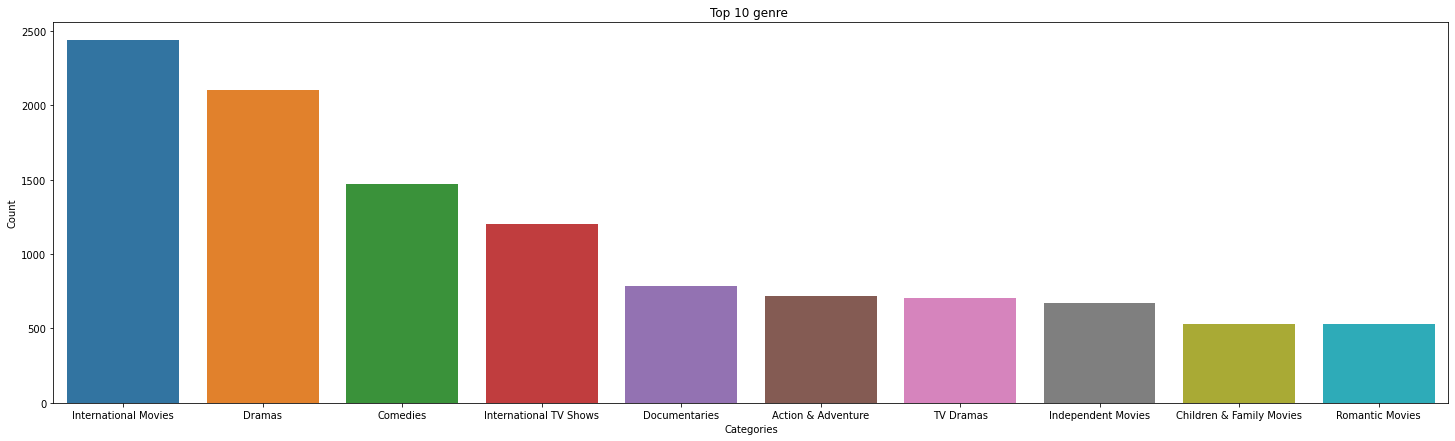

In [15]:
# Bar graph
ld=listed_in_df.sort_values(by='Count',ascending=False)[0:10].reset_index()
plt.figure(figsize=(25,7))
sns.barplot(x="Categories", y="Count", data=ld)
plt.title('Top 10 genre ')

Text(0.5, 1.0, 'Count of Movies and TV shows ')

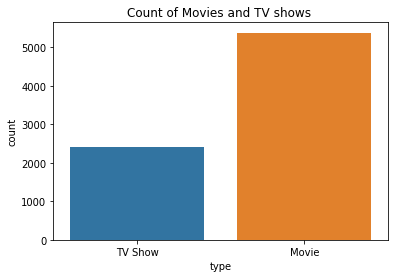

In [16]:
# Count plot
sns.countplot(x='type',data=df)
plt.title('Count of Movies and TV shows ')

In [17]:
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [18]:
# Handling null values
df['country'].fillna(value='No Country',inplace=True)

In [19]:
# Splitting the country column with ',' as delimiter
lc=list(df.country)
list_of_country=[]
for i in range(0,7787):
  list_of_country.append(lc[i].split(','))

In [20]:
# Removing the nested list
output1=[]
def reemovNestings(l):
    for i in l:
        if type(i) == list:
            reemovNestings(i)
        else:
            output1.append(i)

reemovNestings(list_of_country)



In [21]:
# Removing the whitespace
o1=[]
for z in output1:
  o1.append(z.strip())

In [22]:
# Getting the country count
list_of_country_count = {}

for i in o1:
  if i in list_of_country_count.keys():
    list_of_country_count[i] += 1
  else:
    list_of_country_count[i] = 1

In [23]:
# Converting the country count dictionary to dataframe for visualisation
listed_in_df1=pd.DataFrame(list_of_country_count.items(), columns=['Country', 'Count'])
listed_in_df1.set_index('Country')
listed_in_df1.head(4)

,Country,Count
0,Brazil,88
1,Mexico,154
2,Singapore,39
3,United States,3297


Text(0.5, 1.0, 'Top 10 Countries with most number of movies/shows produced')

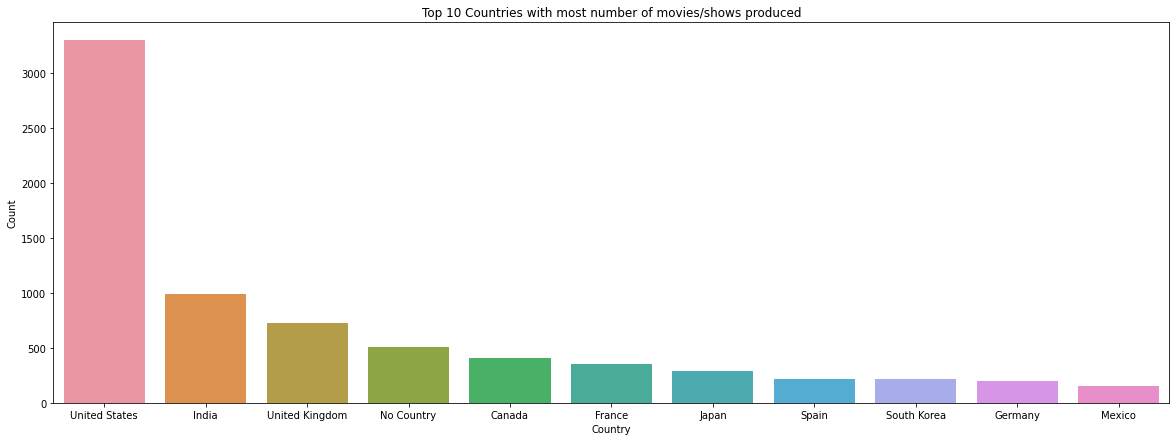

In [24]:
# Bar graph
ld1=listed_in_df1.sort_values(by='Count',ascending=False)[:11].reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x="Country", y="Count", data=ld1)
plt.title('Top 10 Countries with most number of movies/shows produced')

In [25]:
# Importing datetime library to extract year and month from date
import datetime as dt
df['date_added'] = pd.to_datetime(df['date_added'])
df['Year_added'] = df['date_added'].dt.year
df['Month_added']=df['date_added'].dt.month



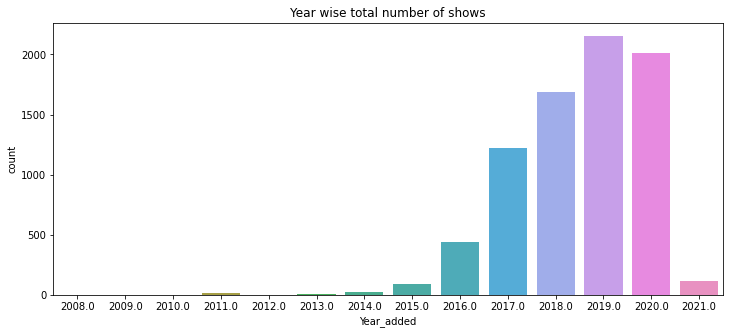

In [26]:
# Bar graph
plt.figure(figsize=(12,5))
plt.title('Year wise total number of shows')
sns.countplot(x='Year_added',data=df)

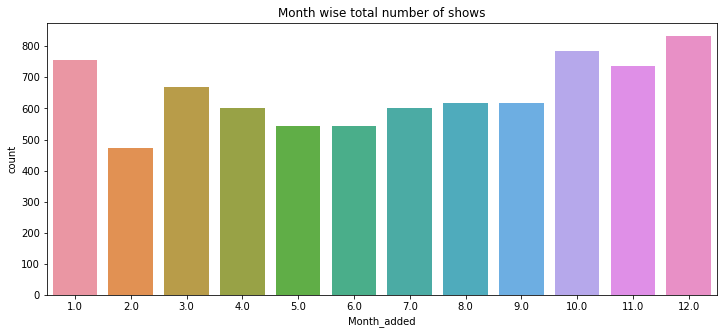

In [27]:
# Bar graph 
plt.figure(figsize=(12,5))
plt.title('Month wise total number of shows')
sns.countplot(x='Month_added',data=df)

In [28]:
# Making a copy of cast column and splitting them using ',' as delimiter
casts = ", ".join(df.copy().fillna("")['cast']).split(", ")

In [29]:
# Getting the cast count dictionary
list_of_casts= {}

for i in casts:
  if i in list_of_casts.keys():
    list_of_casts[i] += 1
  else:
    list_of_casts[i] = 1

In [30]:
# Converting dictionary into dataframe
listed_in_df2=pd.DataFrame(list_of_casts.items(), columns=['Cast_Name', 'Count'])
listed_in_df2.set_index('Cast_Name').head(3)

,Count
Cast_Name,
João Miguel,1
Bianca Comparato,2
Michel Gomes,1


Text(0.5, 1.0, 'Top 10 Cast Name with most number of movies/shows produced')

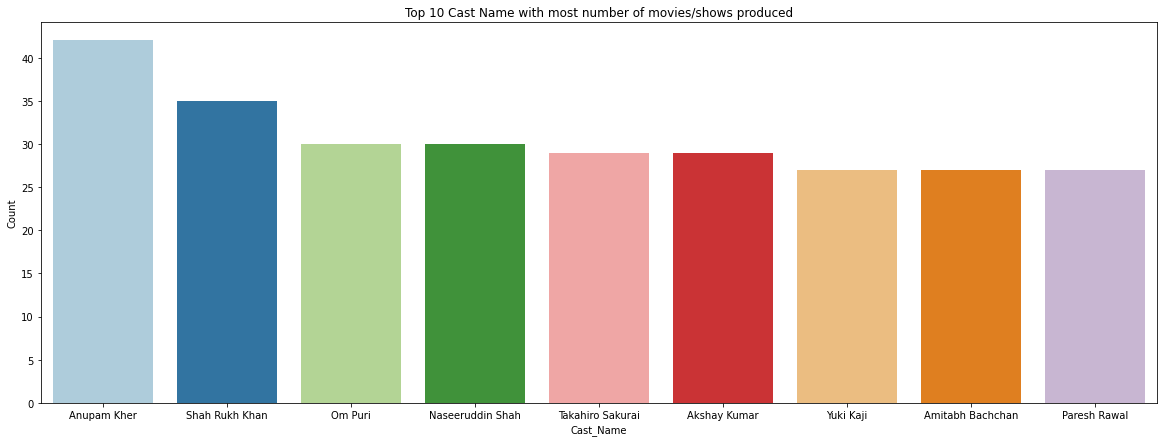

In [31]:
# Bar graph of top 10 actors
ld2=listed_in_df2.sort_values(by='Count',ascending=False)[1:10].reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x="Cast_Name", y="Count", data=ld2,palette="Paired")
plt.title('Top 10 Cast Name with most number of movies/shows produced')

In [32]:
# getting value count of common directors
most_common_directors = df.director.value_counts().head(5).sort_values(ascending=False)

Text(0, 0.5, 'Count')

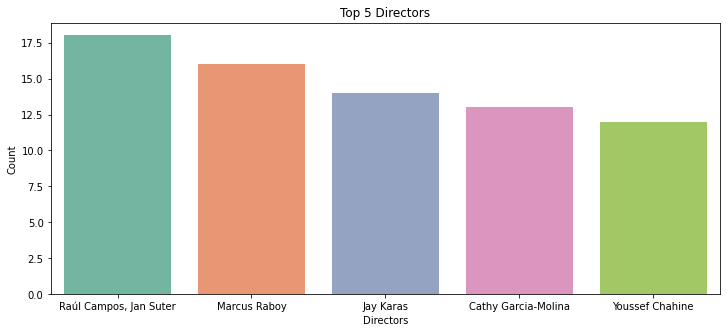

In [33]:
# Bar graph of top 5 directors
md=most_common_directors.reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='index',y='director',data=md,palette='Set2')
plt.title('Top 5 Directors')
plt.xlabel('Directors')
plt.ylabel('Count')

In [34]:
# Bifurcating the movies and tv shows from type column 
movie_rows = df.loc[df["type"] == "Movie"]
tv_rows = df.loc[df["type"] == "TV Show"]

In [35]:
# Getting movie and tv shows count
movies_counts = movie_rows.Year_added.value_counts()
tv_counts = tv_rows.Year_added.value_counts()

Text(0.5, 1.0, 'Content released on Netflix yearly')

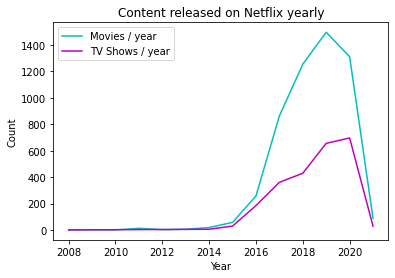

In [36]:
# Line plot
sns.lineplot(data=movies_counts, color="c",label="Movies / year")
sns.lineplot(data=tv_counts, color="m", label="TV Shows / year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Content released on Netflix yearly')

In [37]:
# Importing the necessary libraries for NLP
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
# Function for removing punctuation
def remove_punctuation(text):
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [39]:
# Removing punctuation from description column
df['description']=df['description'].apply(remove_punctuation)

In [40]:
sw = stopwords.words('english')

In [41]:
# Function to remove stopwords
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [42]:
# removing stopwords from description column
df['description']=df['description'].apply(stopwords)

In [43]:
df['description'].head(10)

0    future elite inhabit island paradise far crowd...
1    devastating earthquake hits mexico city trappe...
2    army recruit found dead fellow soldiers forced...
3    postapocalyptic world ragdoll robots hide fear...
4    brilliant group students become cardcounting e...
5    genetics professor experiments treatment comat...
6    awful accident couple admitted grisly hospital...
7    one high school students attacks dedicated tea...
8    doctor goes missing psychiatrist wife treats b...
9    architect wife move castle slated become luxur...
Name: description, dtype: object

In [44]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [45]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [46]:
# Applying stemming to the description column
df['description'] = df['description'].apply(stemming)
df.description.head(10)

0    futur elit inhabit island paradis far crowd sl...
1    devast earthquak hit mexico citi trap survivor...
2    armi recruit found dead fellow soldier forc co...
3    postapocalypt world ragdol robot hide fear dan...
4    brilliant group student becom cardcount expert...
5    genet professor experi treatment comatos siste...
6    aw accid coupl admit grisli hospit separ must ...
7    one high school student attack dedic teacher t...
8    doctor goe miss psychiatrist wife treat bizarr...
9    architect wife move castl slate becom luxuri h...
Name: description, dtype: object

In [47]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [48]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    vectorized_description = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_description, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_description.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

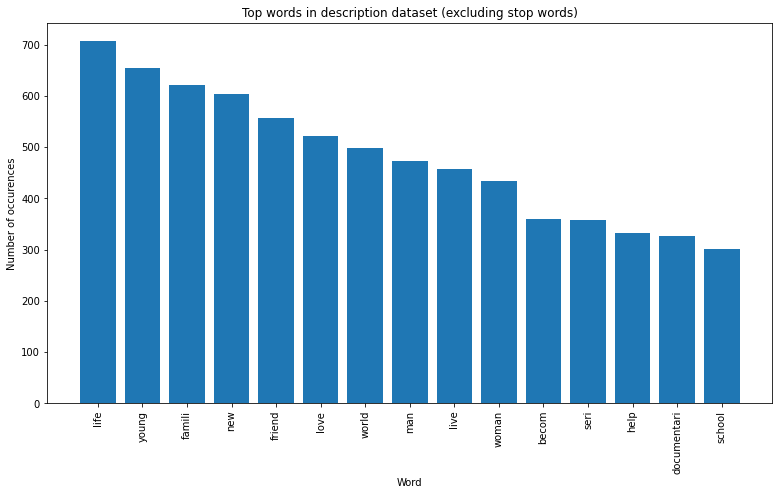

In [49]:
# Initialising count vectoriser object
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df.description)

fig, ax = plt.subplots(figsize=(13,7))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in description dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [50]:
# getting the document term matrix
description_count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)
description_text = df.description

print('Description before vectorization: {}'.format(description_text[123]))

document_term_matrix = description_count_vectorizer.fit_transform(description_text)

print('Description after vectorization: \n{}'.format(document_term_matrix[123]))

Description before vectorization: five friend embark mission climb highest peak java overcom obstacl way discov true mean friendship
Description after vectorization: 
  (0, 1416)	1
  (0, 3709)	1
  (0, 1417)	1
  (0, 2464)	1
  (0, 3898)	1
  (0, 1099)	1
  (0, 2304)	1
  (0, 639)	1
  (0, 2594)	1
  (0, 2537)	1
  (0, 954)	1
  (0, 2224)	1


In [51]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
grid_params = {'n_components' : list(range(6,8))}

# LDA model
lda = LatentDirichletAllocation(batch_size=1000,max_iter=20,doc_topic_prior=0.5, topic_word_prior=0.5,random_state=15)
lda_model = GridSearchCV(lda,param_grid=grid_params,cv=3)
lda_model.fit(document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_


print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:440: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:93: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more d

Best LDA model's params {'n_components': 6}
Best log likelihood Score for the LDA model -253836.02384182703
LDA model Perplexity on train data 2420.7262111022806


In [52]:
!pip install pyLDAvis


In [53]:
import pyLDAvis.sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


pyLDAvis.enable_notebook()

In [54]:
# visualising the clusters
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model,document_term_matrix,description_count_vectorizer,mds='tsne')
lda_panel

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted t

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0       1.465019 -47.625065       1        1  17.743535
5      54.854797 -36.476795       2        1  17.310397
1      32.212929 -61.444572       3        1  17.253094
4       5.111096 -14.110332       4        1  16.843330
2      26.350170 -33.374702       5        1  15.640322
3      38.109818  -7.222781       6        1  15.209323, topic_info=         Term        Freq       Total Category  logprob  loglift
1416   friend  498.000000  498.000000  Default  30.0000  30.0000
1268   famili  551.000000  551.000000  Default  29.0000  29.0000
3986    young  579.000000  579.000000  Default  28.0000  28.0000
2174      man  419.000000  419.000000  Default  27.0000  27.0000
3952    woman  384.000000  384.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
3456  struggl   87.700950  198.307891   Topic6  -5.0574   1.0674
1786    india   61.434220   88.743037   Topic6  -5.4134   1.5155
1665  histori   64.822265  110.566060   Topic6  -5.3597   1.3493
1268   famili   94.836954  551.595606   Topic6  -4.9792   0.1226
572     chang   62.954818  119.188473   Topic6  -5.3890   1.2450

[341 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
69        1  0.017466  accid
69        3  0.960655  accid
69        4  0.017466  accid
69        5  0.017466  accid
69        6  0.017466  accid
...     ...       ...    ...
3986      2  0.001725  young
3986      3  0.559040  young
3986      4  0.436535  young
3986      5  0.001725  young
3986      6  0.001725  young

[1423 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 2, 5, 3, 4])

# **Summary**

## 1. International Movies , Drama and Comedy are the top three genres

## 2. There is more movie content than TV shows content on Netflix .

## 3. United States , India and United Kingdom are the top three countries which produced most number of Movies / TV shows.

## 4. Netflix added highest content in the year 2019 followed by 2020 and 2018.

## 5. December , October and January are the peak months where the content got added on Netflix.

## 6. Anupam Kher , Shah Rukh Khan , Om Puri and Nazeeruddin Shah were the top actors on Netflix content.

## 7. Raul Campos, Jan Suter , Marcus Raboy and Jay Karas were the top directors.

## 8. Netflix is increasingly focusing on Movies in recent years.

## 9. Life , Young , Famili , New , Friend are the most common words in our corpus.

## 10. 6 clusters were generated after clustering ( Topic Modelling ).After analysing the top words in the clusters we were able to name them as 

##      Cluster  --      Name   --               Top relevant words
##         1    --       Crime    --     (forc, power , save)
##         2    --       International movie  -- (world , seri , special)
##         3    --       Romantic      --  (man , woman , young)
##         4    --     Drama     --    (famili , young , life)
##         5    --       Children and family movies   -- (friend , new , school)
##         6    --       Documentary  --  (life , story , live)

## Best LDA model's params {'n_components': 6}
## Best log likelihood Score for the LDA model -253836.02384182703
## LDA model Perplexity on train data 2420.7262111022806









